# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [3]:
# Code Here
#!pip install palmerpenguins

import pandas as pd
from palmerpenguins import load_penguins
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np
from plotnine import *
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score

import warnings
from sklearn.exceptions import ConvergenceWarning


In [4]:
from sklearn.model_selection import train_test_split

penguins = load_penguins()

penguins.dropna(inplace=True)

penguins['year'] = penguins['year'].astype(str)

penguins_dummified = pd.get_dummies(penguins, columns=['species', 'island', 'sex'])

penguins_dummified.head()



X = penguins_dummified.drop('bill_depth_mm', axis=1)
y = penguins_dummified['bill_depth_mm']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)




Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Your best multiple linear regression model from before
* Two kNN models (for different values of K)
* A decision tree model

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

In [5]:


ct = ColumnTransformer(
    [
        ('dummify', OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
         make_column_selector(dtype_include=object)),
        ('standardize', StandardScaler(), make_column_selector(dtype_include=np.number))

    ],
    remainder = "passthrough"
).set_output(transform = "pandas")

# ct.fit_transform(X)

**Linear Regression**

In [12]:
# Linear Regression Pipeline

lr_pipeline_1 = Pipeline(
  [("preprocessing", ct),
  ("linear_regression", LinearRegression())]
)

lr_pipeline_1

scores_lr = cross_val_score(lr_pipeline_1, X, y, cv = 5, scoring = 'neg_mean_squared_error')
mse_predlr = -scores_lr
mselr = mse_predlr.mean()

mselr

scores_trainlr = cross_val_score(lr_pipeline_1, X_train, y_train, cv = 5, scoring = 'neg_mean_squared_error')
mse_pred_trainlr = -scores_trainlr
mse_trainlr = mse_pred_trainlr.mean()

mse_trainlr

scores_testlr = cross_val_score(lr_pipeline_1, X_test, y_test, cv = 5, scoring = 'neg_mean_squared_error')
mse_pred_testlr = -scores_testlr
mse_testlr = mse_pred_testlr.mean()

mse_testlr



0.9093551888055245

**KNN Models**

In [9]:
# k-Nearest Neighbors Model with K=5

knn_pipeline_5 = Pipeline(
    [('preprocessing', ct),
    ('knn', KNeighborsRegressor(n_neighbors = 5))
    ])

scores_knn5 = cross_val_score(knn_pipeline_5, X, y, cv = 5, scoring = 'neg_mean_squared_error')
mse_pred_knn5 = -scores_knn5
mse_knn5 = mse_pred_knn5.mean()

mse_knn5

scores_train_knn5 = cross_val_score(knn_pipeline_5, X_train, y_train, cv = 5, scoring = 'neg_mean_squared_error')
mse_pred_knn5_train = -scores_train_knn5
mse_knn5_train = mse_pred_knn5_train.mean()

mse_knn5_train

scores_test_knn5 = cross_val_score(knn_pipeline_5, X_test, y_test, cv = 5, scoring = 'neg_mean_squared_error')
mse_pred_knn5_test = -scores_test_knn5
mse_knn5_test = mse_pred_knn5_test.mean()

mse_knn5_test


1.014678235294118

In [10]:

# k-Nearest Neighbors Model with K = 10
knn_pipeline_10 = Pipeline(
    [('preprocessing', ct),
    ('knn', KNeighborsRegressor(n_neighbors = 10))
    ])

scores_knn10 = cross_val_score(knn_pipeline_10, X, y, cv = 5, scoring = 'neg_mean_squared_error')
mse_pred_knn10 = -scores_knn10
mse_knn10 = mse_pred_knn10.mean()

mse_knn10

scores_train_knn10 = cross_val_score(knn_pipeline_10, X_train, y_train, cv = 5, scoring = 'neg_mean_squared_error')
mse_pred_knn10_train = -scores_train_knn10
mse_knn10_train = mse_pred_knn10_train.mean()

mse_knn10_train

scores_test_knn10 = cross_val_score(knn_pipeline_10, X_test, y_test, cv = 5, scoring = 'neg_mean_squared_error')
mse_pred_knn10_test = -scores_test_knn10
mse_knn10_test = mse_pred_knn10_test.mean()

mse_knn10_test


0.9331077205882352

**Decision Tree Model**

In [14]:

# Decision Tree Model

dtree_pipeline = Pipeline(
    [('preprocessing', ct),
    ('dtree', DecisionTreeRegressor())
    ])



scores_dtree = cross_val_score(dtree_pipeline, X, y , cv = 5, scoring = 'neg_mean_squared_error')
mse_pred_dtree = -scores_dtree
mse_dtree = mse_pred_dtree.mean()

mse_dtree


scores_dtree_train = cross_val_score(dtree_pipeline, X_train, y_train, cv = 5, scoring = 'neg_mean_squared_error')
mse_pred_dtree_train = -scores_dtree_train
mse_dtree_train = mse_pred_dtree_train.mean()

mse_dtree_train

scores_dtree_test = cross_val_score(dtree_pipeline, X_test, y_test, cv = 5, scoring = 'neg_mean_squared_error')
mse_pred_dtree_test = -scores_dtree_test
mse_dtree_test = mse_pred_dtree_test.mean()

mse_dtree_test


2.6129264705882354

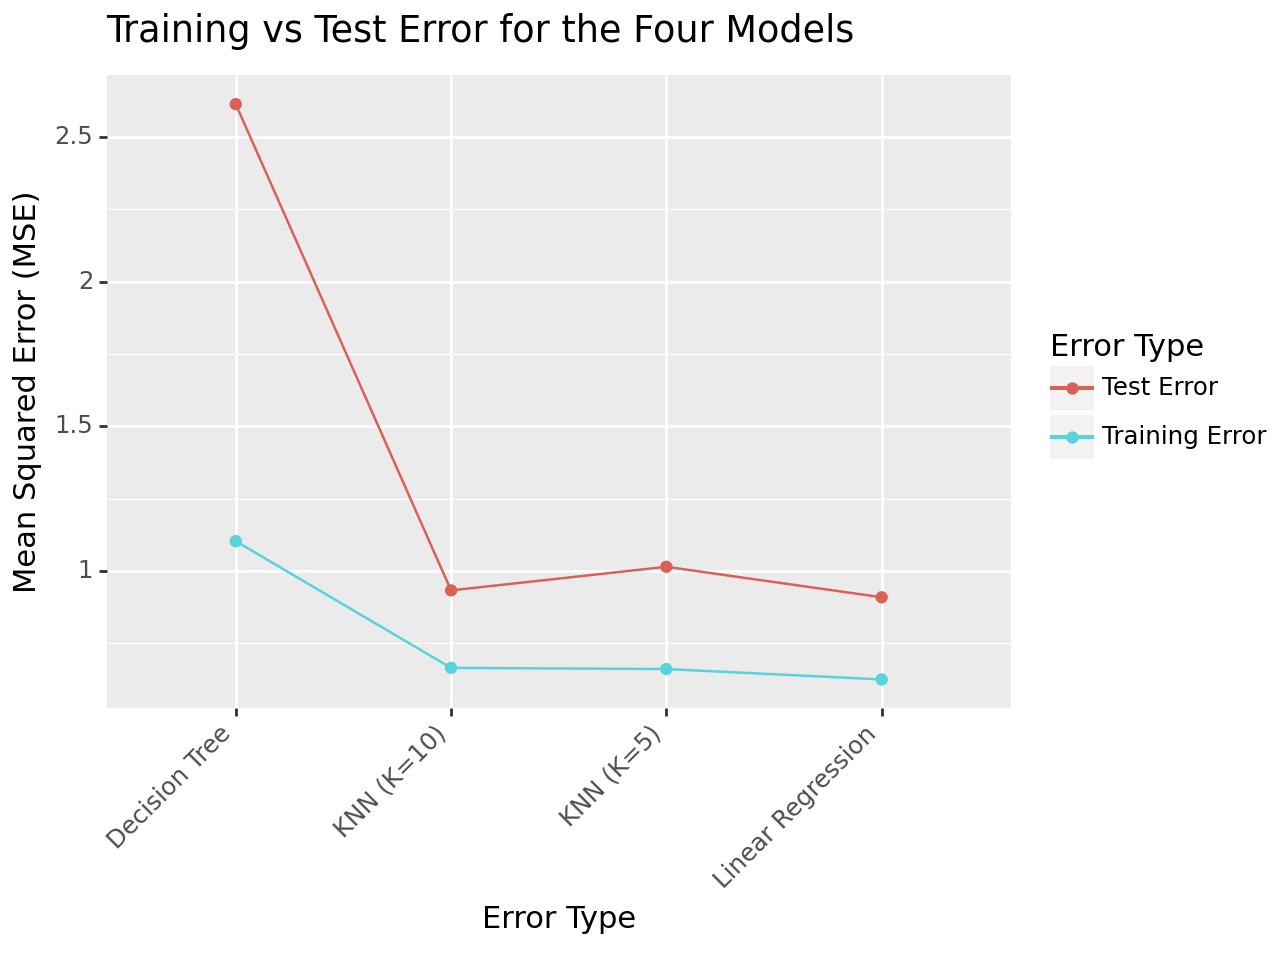

In [18]:
# Plot

data = {
    'Model': ['Linear Regression', 'Linear Regression',
              'KNN (K=5)', 'KNN (K=5)',
              'KNN (K=10)', 'KNN (K=10)',
              'Decision Tree', 'Decision Tree'],
    'Error Type': ['Training Error', 'Test Error'] * 4,
    'MSE': [mse_trainlr, mse_testlr,
            mse_knn5_train, mse_knn5_test,
            mse_knn10_train, mse_knn10_test,
            mse_dtree_train, mse_dtree_test]
}

df = pd.DataFrame(data)


plot = (ggplot(df, aes(x='Model', y='MSE', color='Error Type')) +
        geom_point() +
        geom_line(aes(group='Error Type')) +
        labs(title='Training vs Test Error for the Four Models',
             x='Error Type',
             y='Mean Squared Error (MSE)') +
        theme(axis_text_x=element_text(angle=45, hjust=1)))


print(plot)